In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
#url variables
politician_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/politician-trading-data/politician-trading-data-csv/politician-trading-data-BUY2020-final.csv"

#download csv
pol_download = requests.get(politician_data_csv_url).content

In [3]:
#read file to data frame
pol_df = pd.read_csv(io.StringIO(pol_download.decode('utf-8')))

In [4]:
#Drop NA from 12
pol_df = pol_df[pol_df.PERCENT_CHANGE_3_MONTH != '#DIV/0!']
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_3_MONTH'])
pol_df.head()

,REP_FULLNAME,REP_STATE,REP_TYPE,REP_PARTY,COMPANY_TICKER,COMPANY_CODE,COMPANY_COUNTRY,COMPANY_NAME,TRANSACTION_TYPE,TRANSACTION_DATE,TRANSACTION_PRICE,SHARE_TYPE,TRANSACTION_SHARE_PRICE,TRANSACTION_SHARE_QUANTITY,SHARE_PRICE_3_MONTH,SHARE_PRICE_6_MONTH,SHARE_PRICE_1_YEAR,PERCENT_CHANGE_3_MONTH,PERCENT_CHANGE_6_MONTH,PERCENT_CHANGE_12_MONTH
0,David Roe,TN,Congress,Republican,AAPL,AAPL US,US,Apple Inc,Buy,12/31/2020,8000,Com NPV,132.69,60,122.15,136.33,NaN,-7.94,2.74,NaN
1,David Roe,TN,Congress,Republican,ACN,ACN US,US,Accenture Plc,Buy,12/31/2020,16001,Com A,261.21,60,276.25,296.43,NaN,5.76,13.48,NaN
2,David Roe,TN,Congress,Republican,ADBE,ADBE US,US,Adobe Inc,Buy,12/31/2020,8000,Com,500.12,14,475.37,590.75,NaN,-4.95,18.12,NaN
3,David Roe,TN,Congress,Republican,AEP,AEP US,US,American Electric Power Co Inc,Buy,12/31/2020,8000,Com,83.27,96,84.70,83.93,NaN,1.72,0.79,NaN
4,David Roe,TN,Congress,Republican,AMGN,AMGN US,US,Amgen Inc,Buy,12/31/2020,8000,Com,229.92,34,248.81,242.46,NaN,8.22,5.45,NaN


In [5]:
#create a dataframe where party = republican
pol_df = pol_df.loc[pol_df["REP_PARTY"] == "Democratic"]

In [6]:
#group by % change 12 month
pol_df['PERCENT_CHANGE_3_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_3_MONTH'], downcast="integer")
pol_df['TRANSACTION_SHARE_PRICE'] = pd.to_numeric(pol_df['TRANSACTION_PRICE'], downcast="integer")
pol_df = pol_df.groupby(['REP_FULLNAME']).agg({"TRANSACTION_PRICE": "sum", "PERCENT_CHANGE_3_MONTH":"mean"}).reset_index()
pol_df.head()

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_3_MONTH
0,Alan Lowenthal,1081665,21.749419
1,Brian Higgins,32500,6.120000
2,Cheryl Bustos,32500,2.740000
3,Cynthia Axne,320012,7.507917
4,Daniel Lipinski,415501,3.428667


In [7]:
#create a column titled dollar return that takes the summed transaction costs multipled by the % returns
pol_df["DECIMAL_CHANGE_2020"] = (pol_df.PERCENT_CHANGE_3_MONTH/100)
pol_df["NOMINAL_GAINS_2020"] = pol_df.TRANSACTION_PRICE * pol_df["DECIMAL_CHANGE_2020"]
pol_df.head()

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_3_MONTH,DECIMAL_CHANGE_2020,NOMINAL_GAINS_2020
0,Alan Lowenthal,1081665,21.749419,0.217494,235255.848750
1,Brian Higgins,32500,6.120000,0.061200,1989.000000
2,Cheryl Bustos,32500,2.740000,0.027400,890.500000
3,Cynthia Axne,320012,7.507917,0.075079,24026.234283
4,Daniel Lipinski,415501,3.428667,0.034287,14246.144287


In [8]:
#sort by top 10
pol_df = pol_df.sort_values(by=['NOMINAL_GAINS_2020'], ascending=False)
pol_df = pol_df.head(10)
pol_df

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_3_MONTH,DECIMAL_CHANGE_2020,NOMINAL_GAINS_2020
39,Suzan Delbene,15774000,7.208000,0.072080,1.136990e+06
34,Rohit Khanna,18466813,5.153760,0.051538,9.517353e+05
35,Ronald Wyden,6769003,13.059241,0.130592,8.839804e+05
17,Gilbert Cisneros,4372001,15.058647,0.150586,6.583642e+05
24,Joshua Gottheimer,1646000,14.645363,0.146454,2.410627e+05
0,Alan Lowenthal,1081665,21.749419,0.217494,2.352558e+05
29,Nancy Pelosi,1500000,15.220000,0.152200,2.283000e+05
7,Dean Phillips,1868501,11.618140,0.116181,2.170851e+05
43,Tomasz Malinowski,1060501,19.265385,0.192654,2.043096e+05
41,Thomas Carper,904500,19.671101,0.196711,1.779251e+05


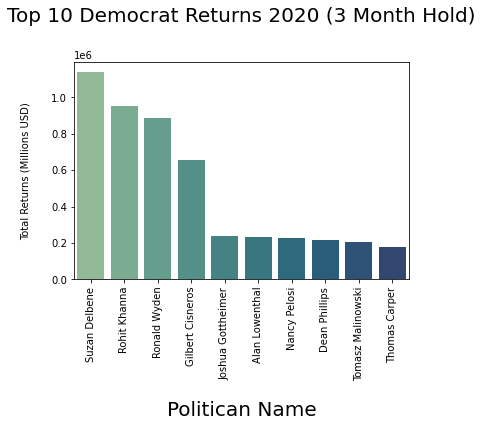

In [9]:
#graph the bar chart
palette = sns.color_palette("crest",10)
ax=sns.barplot(x=pol_df["REP_FULLNAME"], y=pol_df["NOMINAL_GAINS_2020"],palette=palette)
ax.set_xlabel("Politican Name",fontsize=20,labelpad=20)
ax.set_ylabel("Total Returns (Millions USD)",fontsize=10,labelpad=20)
ax.set_title("Top 10 Democrat Returns 2020 (3 Month Hold)", fontsize=20, pad=40)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=10)
plt.savefig('bfb_visualization_5_THREE_DEM_bar')